In [2]:
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import swifter

# stats imports
import statsmodels.api as sm
import pingouin as pt
from scipy.stats import pearsonr

#sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error

# mapping imports
import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster, MarkerCluster
from branca.element import Template, MacroElement # import to add legend method


In [3]:
pd.options.display.max_columns=300
sns.set_style('darkgrid')

# High Latency DF including outliers
* Outliers will be removed from each layer and added to an outlier dataframe

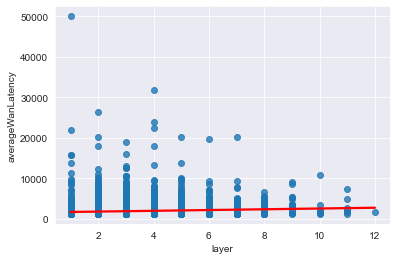

In [92]:
sns.regplot(x='layer', y='averageWanLatency', data=highLatenceyDF, line_kws={'color':'red'});

In [93]:
outlierDF = pd.DataFrame()

In [94]:
layers = list(highLatenceyDF.layer.unique())
layers.sort()
for layer in layers:
    upper = highLatenceyDF.loc[highLatenceyDF.layer == layer].averageWanLatency.quantile(.99)
    temp = highLatenceyDF.loc[(highLatenceyDF.layer == layer) & (highLatenceyDF.averageWanLatency > upper)]
    outlierDF = pd.concat([outlierDF, temp])

In [95]:
highLatenceyDF = highLatenceyDF.drop(list(outlierDF.index))

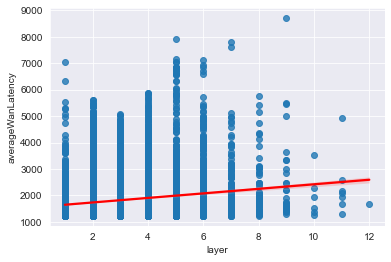

In [96]:
sns.regplot(x='layer', y='averageWanLatency', data=highLatenceyDF, line_kws={'color':'red'});

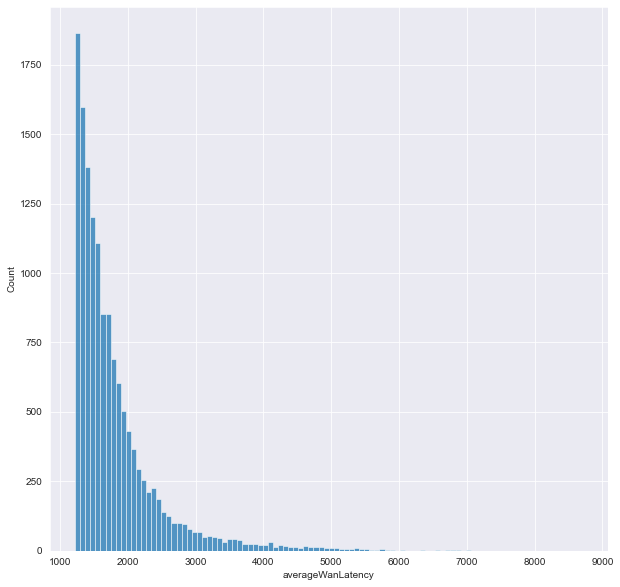

In [97]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.histplot(x='averageWanLatency', data=highLatenceyDF, bins=100)

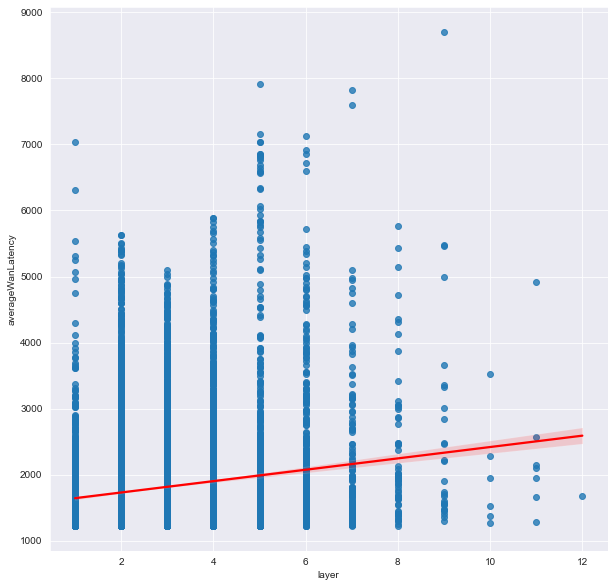

In [98]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.regplot(x='layer', y='averageWanLatency', data=highLatenceyDF, line_kws={'color':'red'})

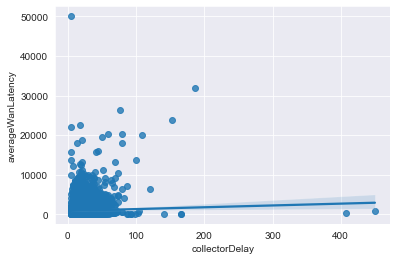

In [100]:
ax = sns.regplot(x='collectorDelay', y='averageWanLatency', data=df)

# Description of all numerical data

In [101]:
lowPowerDF = df.loc[(df.rfPower == 'Low (17 dBm)') | (df.rfPower == 'Low (21 dBm)')]

In [102]:
rfPower = lowPowerDF.groupby('rfPower').count()
rfPower.reset_index(inplace=True)

rfPower = rfPower[['rfPower', 'meterNo']]
rfPower.rename(columns={'meterNo': 'count'}, inplace=True)

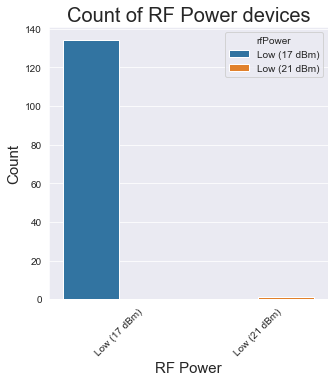

In [103]:
title = 'Count of RF Power devices'
titleFont = 20
ylabel = 'Count'
xlabel = 'RF Power'
xyLabelFont = 15
labels = list(rfPower.rfPower)

fig, ax = plt.subplots(figsize=(5, 5))
rfChart = sns.barplot(x='rfPower', y='count', hue='rfPower', data=rfPower)
rfChart.set_xlabel(xlabel, fontsize=xyLabelFont)
rfChart.set_ylabel(ylabel, fontsize=xyLabelFont)
rfChart.set_title(title, fontsize=titleFont)
rfChart.set_xticklabels(labels=labels, rotation=45);

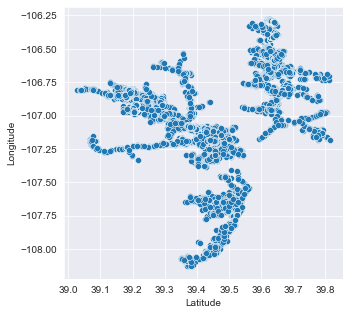

In [104]:
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.scatterplot(x='latitude', y='longitude', data=df)
ax.set_ylabel('Longitude')
ax.set_xlabel('Latitude');

# Early EDA

In [105]:
analyticDF.lagTimeSeconds.mean()

438.68087205321154

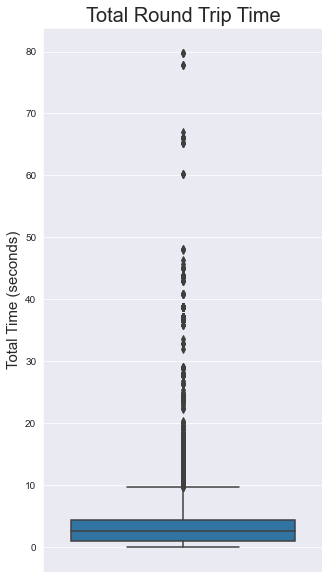

In [106]:
fig, ax = plt.subplots(figsize = (5,10))
time = sns.boxplot(y=analyticDF.largestHop, orient='v', width=0.8, ax=ax);
time.set_ylabel('Total Time (seconds)', fontsize=15)
time.set_title('Total Round Trip Time', fontsize=20);

Text(0.5, 1.0, 'Total Round Trip Time')

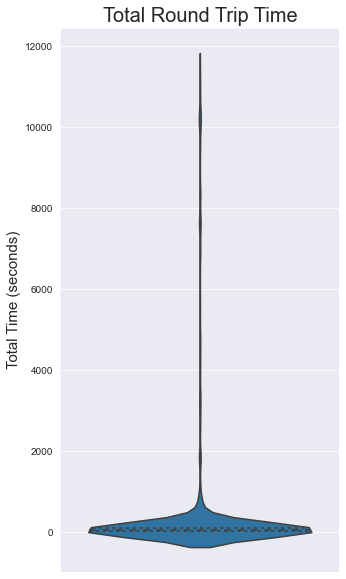

In [107]:
fig, ax = plt.subplots(figsize = (5,10))
time = sns.violinplot(y=df.lagTimeSeconds, inner='quartile', orient='v', width=0.8, scale='count', ax=ax);
time.set_ylabel('Total Time (seconds)', fontsize=15)
time.set_title('Total Round Trip Time', fontsize=20)

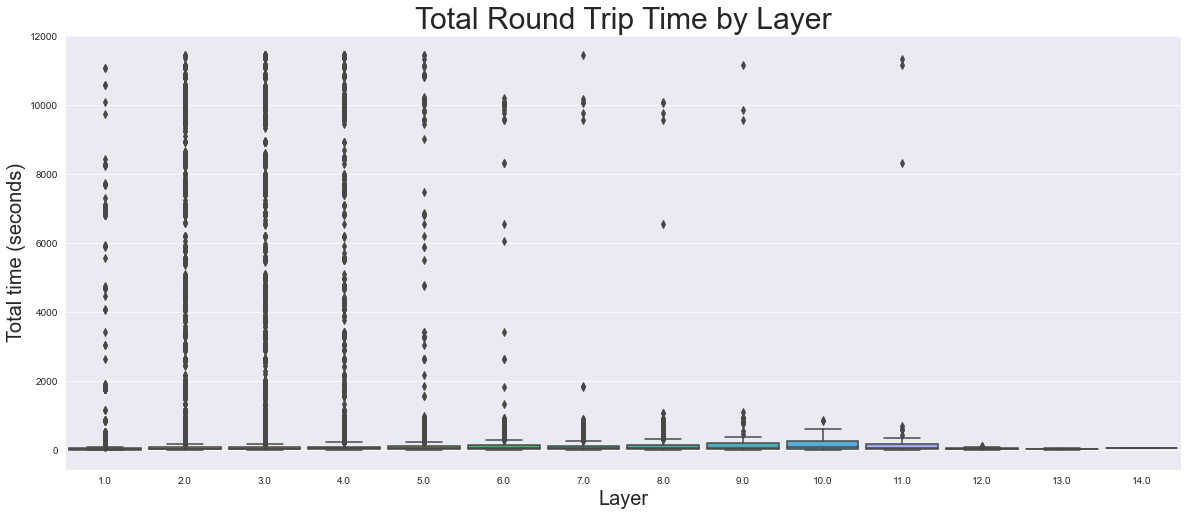

In [108]:
fig, ax = plt.subplots(figsize = (20,8))
timeByLayer = sns.boxplot(y=df.lagTimeSeconds, x=analyticDF.layer, orient='v', width=0.9, ax=ax);
timeByLayer.set_xlabel('Layer', fontsize=20)
timeByLayer.set_ylabel('Total time (seconds)', fontsize=20)
timeByLayer.set_title('Total Round Trip Time by Layer', fontsize=30);

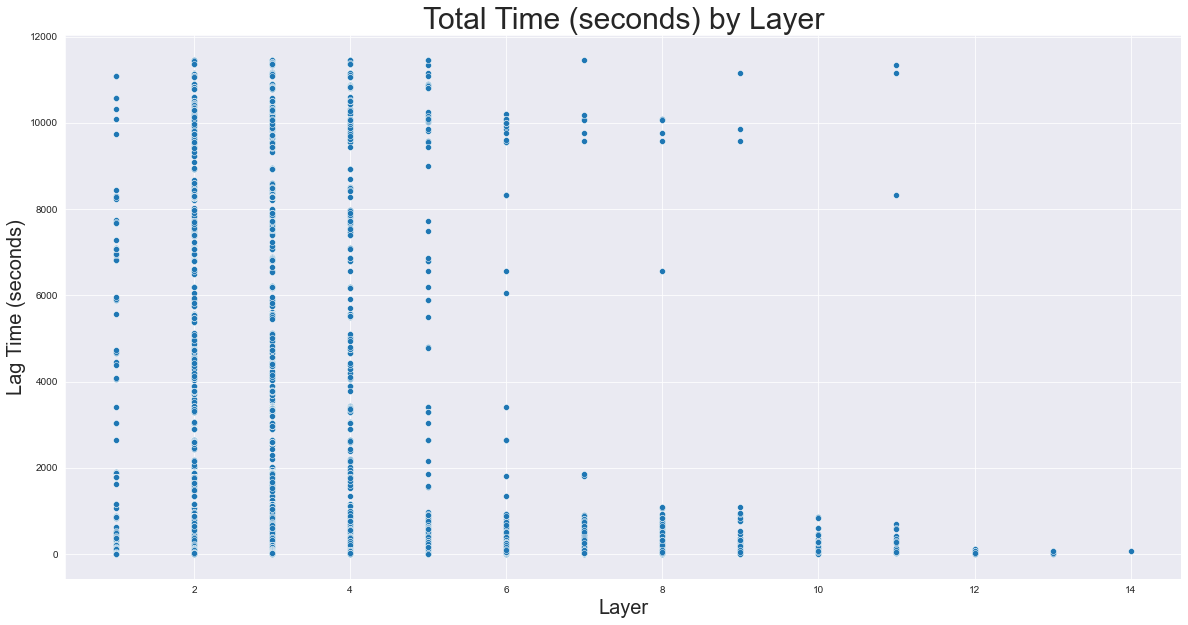

In [109]:
fig, ax = plt.subplots(figsize = (20, 10))
scatterTime = sns.scatterplot(x='layer', y='lagTimeSeconds', data=df)
scatterTime.set_xlabel('Layer', fontsize=20)
scatterTime.set_ylabel('Lag Time (seconds)', fontsize=20)
scatterTime.set_title('Total Time (seconds) by Layer', fontsize=30);